In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Bootstrapping 

- *random sampling with replacement*
- resampling technique to simulate drawing new samples (where repeating experiments is not feasible or possible)
- typically, the new sample has size *n*, where *n* is the size of the original dataset

## Sample mean, standard error of the mean,  and estimating the population mean

**Question 1** Read file and build histogram

In [32]:
df = ... #read iris.csv

x = df['sepal_length'].values
x_mean = ...
... #build histogram with 10 bins
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('sepal length in cm')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

TypeError: 'ellipsis' object is not subscriptable

#### Standard Error (SE)

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

- the standard error *SE* (or *standard error of the mean*) estimates the standard deviation (*s*) of the sample mean ($\bar{x}$)
- i.e., the *SE* measures the variability when taking different samples from the population
- in other words, the *SE* measures the variability between samples, whereas the sample standard deviation measures the variability within a sample
- we use the standard error to judge how "good" our estimate of the population mean ($\mu$) is

**Question 2** Find Standard error using the formula above

In [4]:
std = ...
...
se = ...
print('standard error', se)

standard error 0.0676113162275986


In [5]:
scipy.stats.sem(x)

0.0676113162275986

#### Bootstrapping and estimating the population mean

Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics. Bootstrap methods are alternative approaches to traditional hypothesis testing and are notable for being easier to understand and valid for more conditions.

#### How Bootstrapping Resamples Your Data to Create Simulated Datasets
Bootstrapping resamples the original dataset with replacement many thousands of times to create simulated datasets. This process involves drawing random samples from the original dataset. Here’s how it works:

   1. The bootstrap method has an equal probability of randomly drawing each original data point for inclusion in
       the resampled datasets.
   2. The procedure can select a data point more than once for a resampled dataset. This property is the “with 
       replacement” aspect of the process.
   3. The procedure creates resampled datasets that are the same size as the original dataset.

The process ends with your simulated datasets having many different combinations of the values that exist in the original dataset. Each simulated dataset has its own set of sample statistics, such as the mean, median, and standard deviation. Bootstrapping procedures use the distribution of the sample statistics across the simulated samples as the sampling distribution.

In [6]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

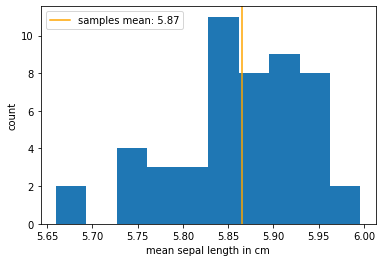

In [33]:
boot_50 = bootstrap_means(x, n_bootstrap_samples=50, seed=123)

boot_mean = np.mean(boot_50)
plt.hist(boot_50, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

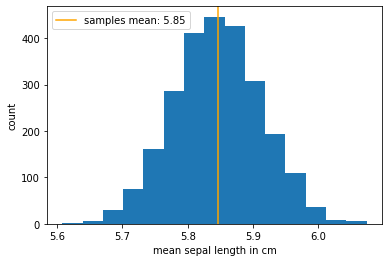

In [8]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

**Question 3** Rewrite function **bootstrap_means** using a **while loop** and then run the cell after

In [ ]:
def bootstrap_means_while(x, n_bootstrap_samples, seed=None):
    ...
    return sample_means

In [ ]:
boot_2500 = bootstrap_means_while(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

- note: no matter how the sample is distributed, the sample mean follows a normal distribution

In [9]:
np.std(boot_2500, ddof=1)

0.06666436312360136

- remember, the standard deviation of the bootstrap replicates (means) estimates the standard error of the mean (which estimates the standard deviation of the population mean)

In [10]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [11]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y

Text(0, 0.5, 'CDF')

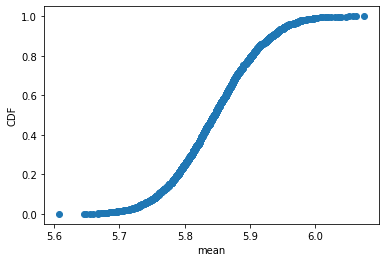

In [12]:
ecdf_x, ecdf_y = empirical_cdf(boot_2500)
plt.scatter(ecdf_x, ecdf_y)
plt.xlabel('mean')
plt.ylabel('CDF')

## Confidence Intervals

- 95% confidence interval: 95% of the sample means (if we would draw new samples / repeat the experiments) would fall within the confidence interval

####  From bootstrap replicates:

In [30]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.72, 5.96]


#### From the original data (i.e., from a single sample):

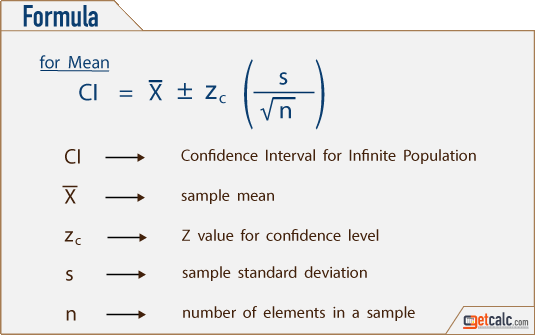

**Question 4** Calculate confidence interval using the formula, without using **scipy.stats.norm.interval(alpha=0.95,scale=se)**

In [31]:
def confidence_interval(x, ci=0.95):
    x_mean = ...
    confidence_level = scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    n = ...
    standard_deviation = ...
    return ... #should return to values x_mean +- confidence_level(standard_deviation / sqrt(n))

lower, upper = confidence_interval(x, ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

TypeError: cannot unpack non-iterable ellipsis object